**Exercise 11.11**.  Simulate 100 pairs of $(X_t, Y_t)$ from the model of Equation (11.3.1) on page 261 with $d = 3$, $β_0 = 0$, and $β_1 = 1$.  Use $\sigma_X = 2$ and $\sigma_e = 1$.  Display and interpret the sample CCF between these two series.

**Solution**.  The model of Equation (11.3.1) is

$$ Y_t = \beta_0 + \beta_1 X_{t - d} + e_t $$

where $\{X_t\}$ are independent, identically distributed random variables with variance $\sigma_X$ and the errors $\{ e_t \}$ are also white noise with variance $\sigma_e^2$ and are independent of the $X$'s.

In [1]:
set.seed(0)

n = 100
sigma_e = 1
sigma_X = 2
beta_0 = 0
beta_1 = 1
d = 3

X_t = rnorm(n+d, sd=sigma_X)
e_t = rnorm(n, sd=sigma_e)

Y_t = beta_0 + beta_1 * X_t[-(1:d)] + e_t

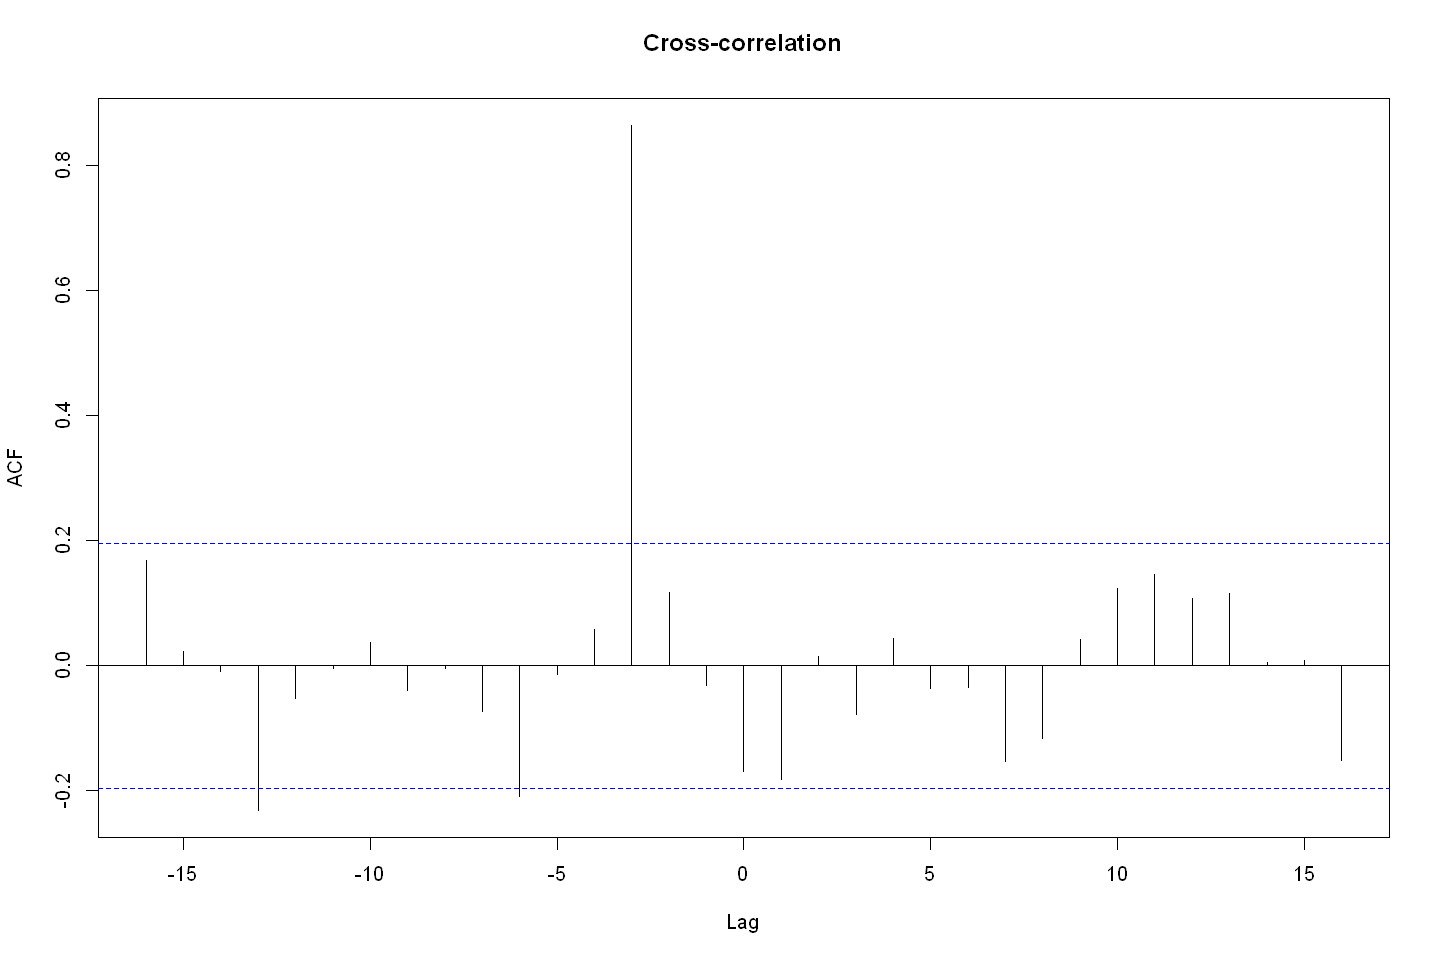

In [2]:
options(repr.plot.width=12, repr.plot.height=8)

ccf(Y_t, X_t[(1:n)], main='Cross-correlation')

The most statistically significant cross-correlation occurs at lag -3.  This coincides with the theoretical analysis -- all cross-correlations should be zero, other than $\rho_{-3}(X, Y) = 2 / \sqrt{4 + 1} \approx 0.894$.

**Exercise 11.12**.  Show that when the $X$ and $Y $are independent AR(1) time series with parameters $\phi_X$ and $\phi_Y$, respectively, Equation (11.3.5) on page 262 reduces to give Equation (11.3.6).

**Solution**.  Equation (11.3.5) states that, for stationary and independent processes $X$ and $Y$, the variance of $\sqrt{n} r_k(X, Y)$ is approximately

$$ 1 + 2\sum_{k=1}^\infty \rho_k(X) \rho_k(Y) \tag{11.3.5} $$

If $X$ and $Y$ are AR(1) processes, then $\rho_k(X) = \phi_X^k$ and $\rho_k(Y) = \phi_Y^k$, so the equation above reduces to an infinite geometric sum

$$ 1 + 2 \sum_{k=1}^\infty (\phi_X \phi_Y)^k = 1 + \frac{2 \phi_X \phi_Y}{1 - \phi_X \phi_Y} = \frac{1 + \phi_X \phi_Y}{1 - \phi_X \phi_Y} $$

therefore, the variance of $r_k(X, Y)$ is approximately

$$ \frac{1 + \phi_X \phi_Y}{n (1 - \phi_X \phi_Y)} \tag{13.5.6} $$

which is our result.

**Exercise 11.13**.  Show that for the process defined by Equation (11.4.5) on page 266, the cross-correlation between $\tilde{X}$ and $\tilde{Y}$ at lag $k$ is given by $\beta_{-k}(\sigma_\tilde{X} / \sigma_\tilde{Y})$.

**Solution**.  Equation (11.4.5) defines

$$ \tilde{Y}_t = \sum_k \beta_k \tilde{X}_{t - k} + \tilde{Z}_t \tag{11.4.5} $$

Therefore, the covariance at lag $\ell$ is

$$ 
\begin{align}
\text{Cov}[\tilde{X}_t, \tilde{Y}_{t - \ell}] &= \text{Cov}\left[\tilde{X}_t, \sum_k \beta_k \tilde{X}_{t - k} + \tilde{Z}_t\right]\\
&= \beta_{-\ell} \text{Cov}[\tilde{X}_t, \tilde{X}_t] \\
&= \beta_{-\ell} \sigma_\tilde{X}^2
\end{align}
$$

and so the correlation at lag $k$ is

$$ 
\text{Corr}[\tilde{X}_t, \tilde{Y}_{t - k}] 
= \frac{\text{Cov}[\tilde{X}_t, \tilde{Y}_{t - k}]}{\sqrt{\text{Var}[\tilde{X}_t] \text{Var}[\tilde{Y}_{t - k}]}}
= \beta_{-k} \frac{\sigma_\tilde{X}^2}{\sigma_\tilde{X} \sigma_\tilde{Y}}
= \beta_{-k} \frac{\sigma_\tilde{X}}{\sigma_\tilde{Y}}
$$

**Exercise 11.14**.  Simulate an AR time series with $\phi = 0.7$, $\mu = 0$, $\sigma_e = 1$, and of length $n = 48$.  Plot the time series, and inspect the sample ACF and PACF of the series.

**(a)** Now add a step function response of $\omega = 1$ unit height at time $t = 36$ to the simulated series.  The series now has a theoretical mean of zero from $t =$ 1 to 35 and a mean of 1 from $t = 36$ on.  Plot the new time series and calculate the
sample ACF and PACF for the new series.  Compare these with the results for the original series.

**(b)** Repeat part (a) but with an impulse response at time $t = 36$ of unit height, $ω = 1$. Plot the new time series, and calculate the sample ACF and PACF for the new series.  Compare these with the results for the original series.  See if you can detect the additive outlier at time $t = 36$ assuming that you do not know where the outlier might occur.

**Solution**.

In [3]:
set.seed(0)
Y <- arima.sim(model=list(ar=0.7), n=48)

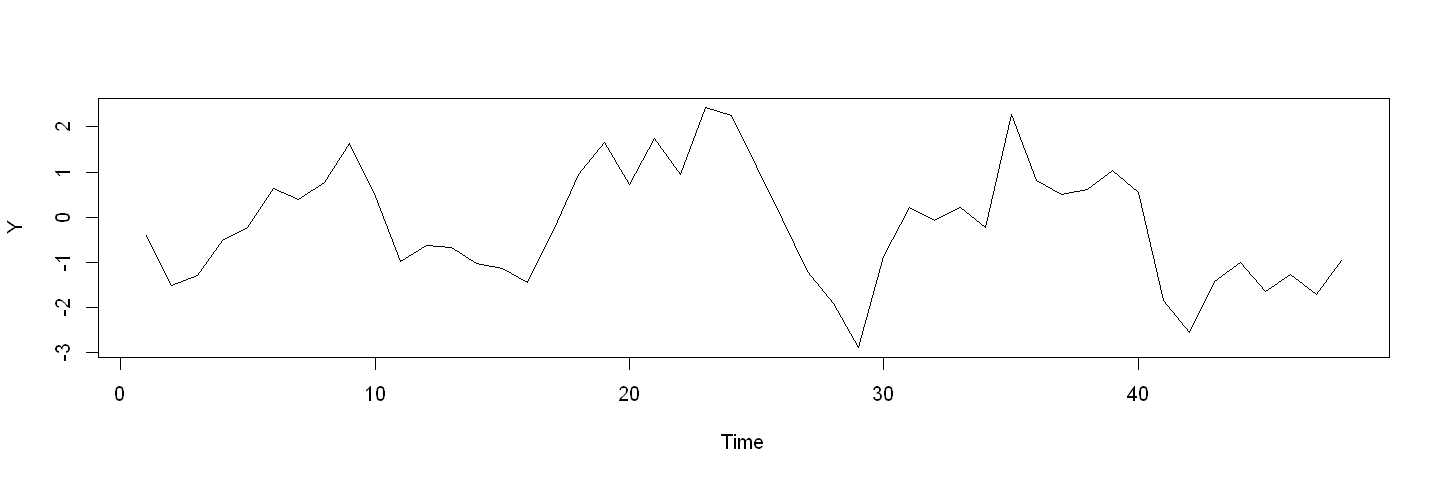

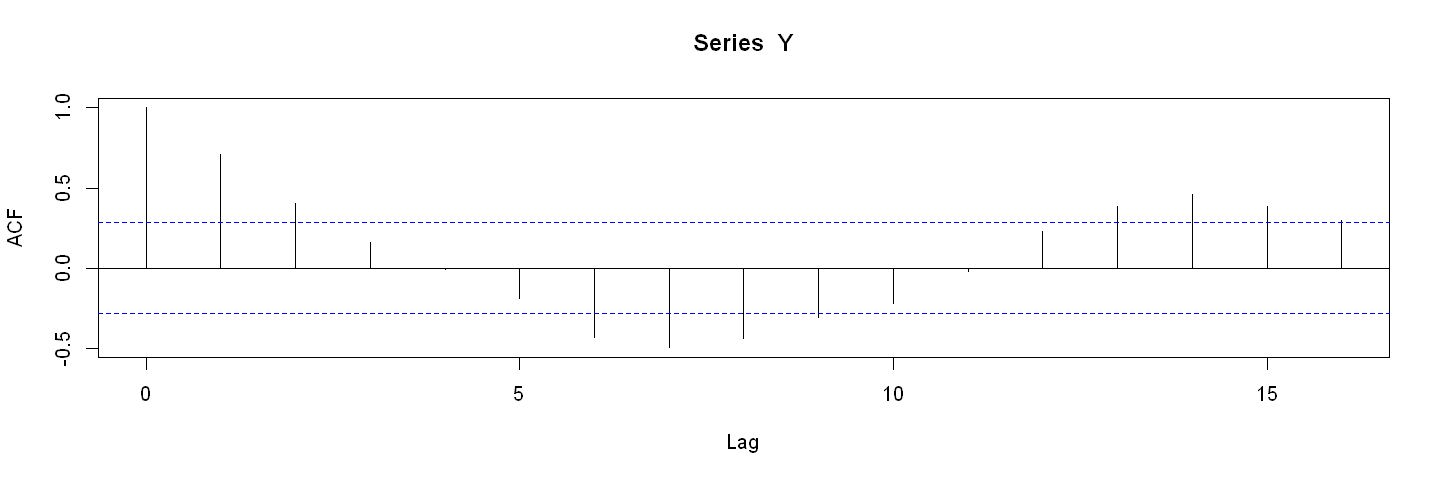

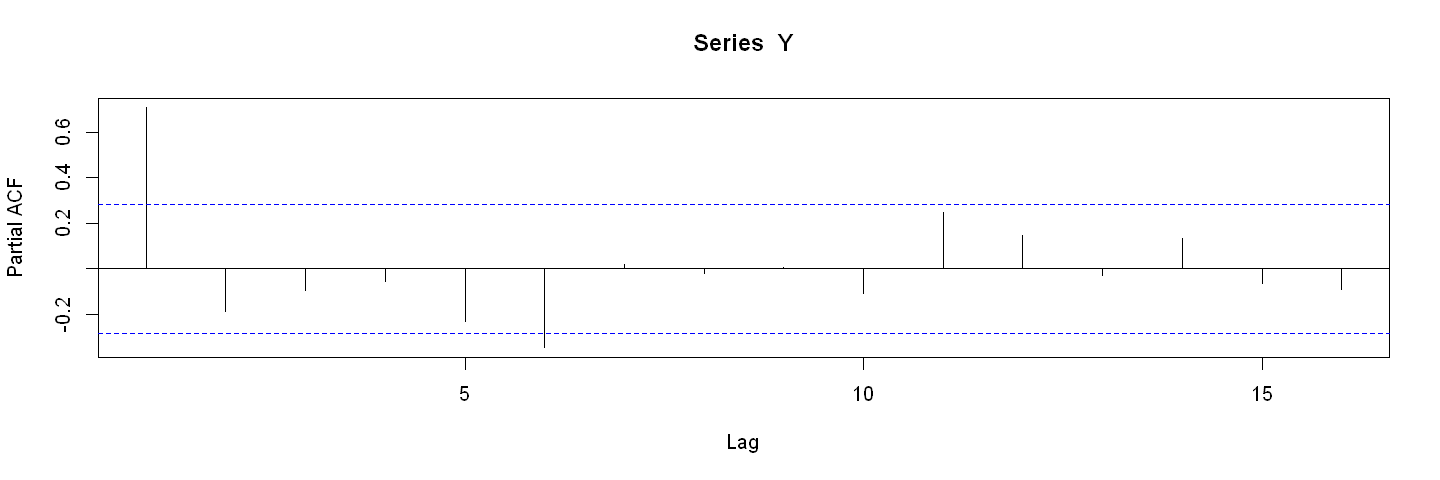

In [4]:
options(repr.plot.width=12, repr.plot.height=4)

plot(Y)
acf(Y)
pacf(Y)

PACF suggests an AR(1) process.

**(a)**

In [5]:
Ya <- Y + c(rep(0, 35), rep(1, 13))

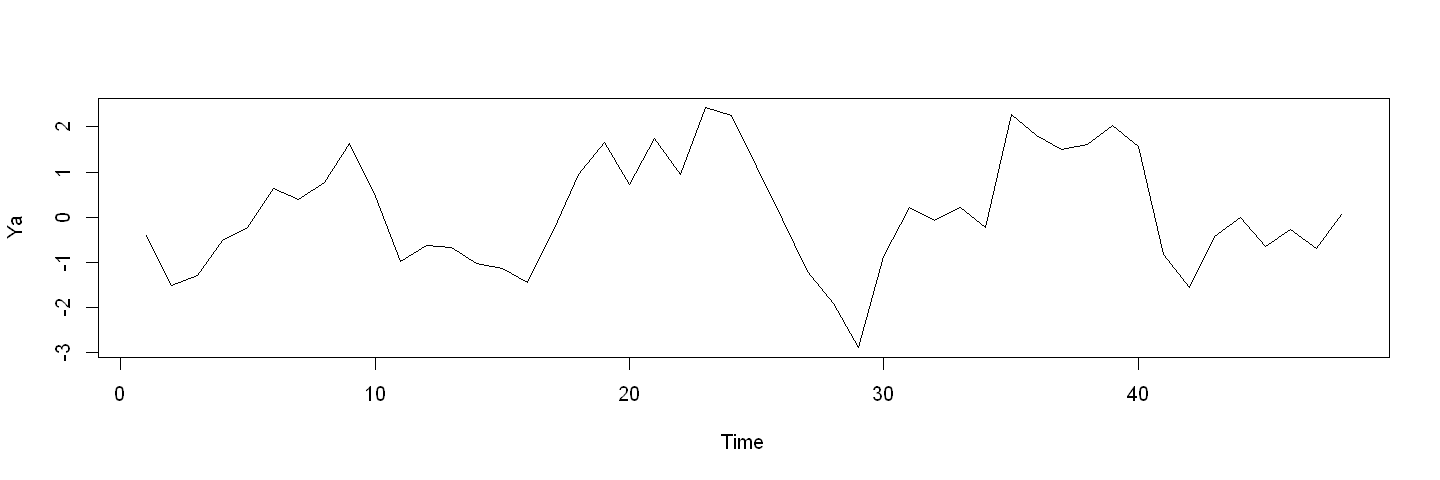

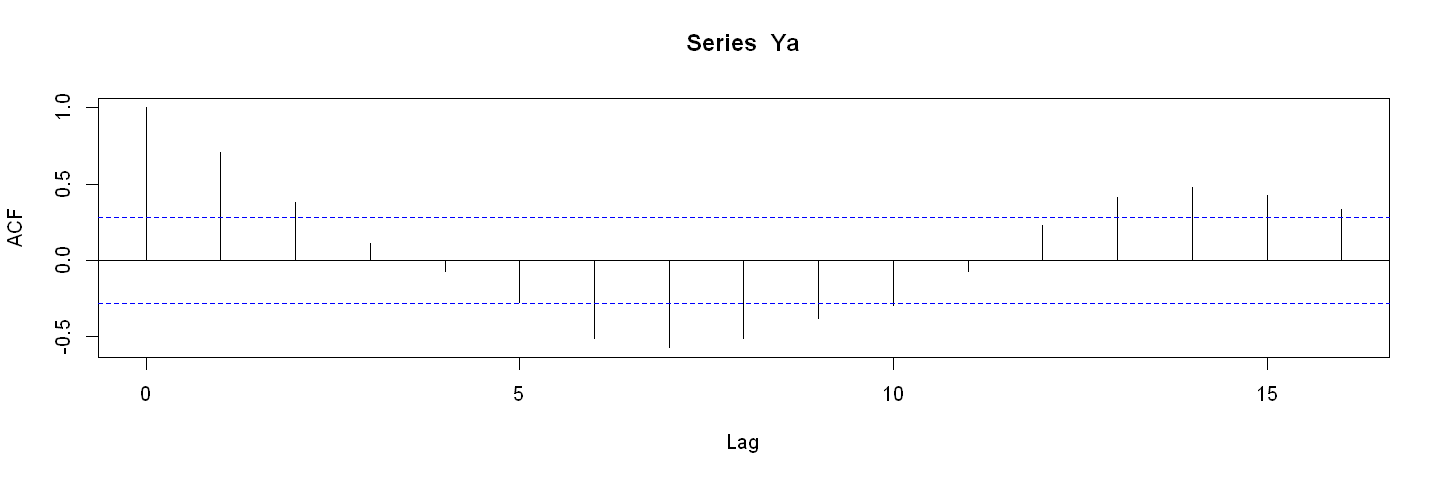

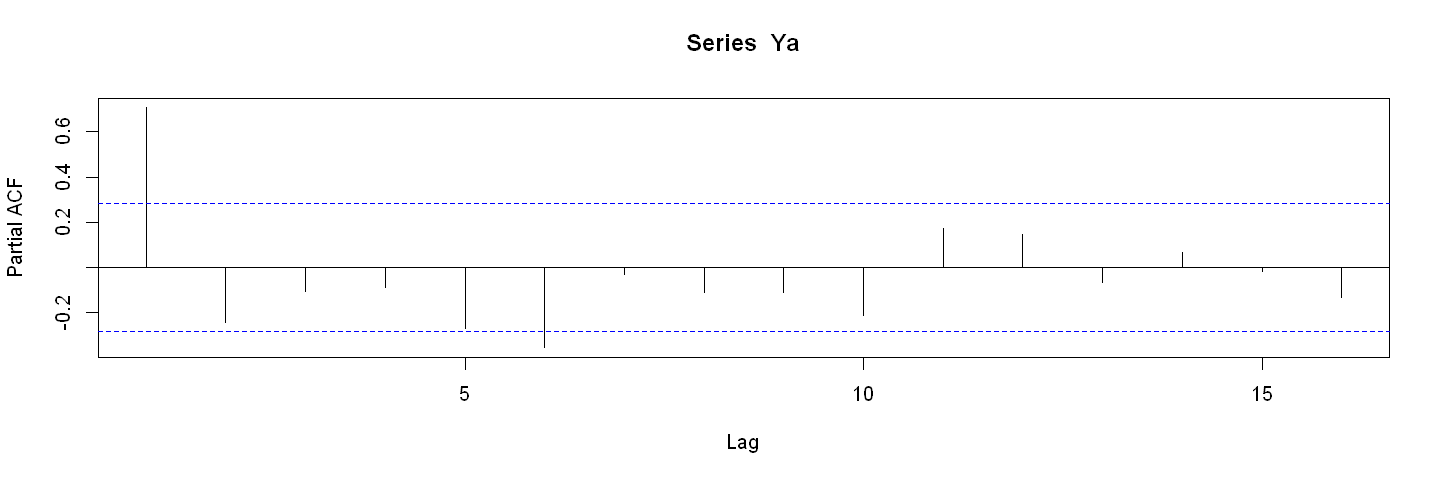

In [6]:
options(repr.plot.width=12, repr.plot.height=4)

plot(Ya)
acf(Ya)
pacf(Ya)

Results look very similar to the original results.

**(b)**

In [7]:
Yb <- Y
Yb[35] = Y[35] + 1

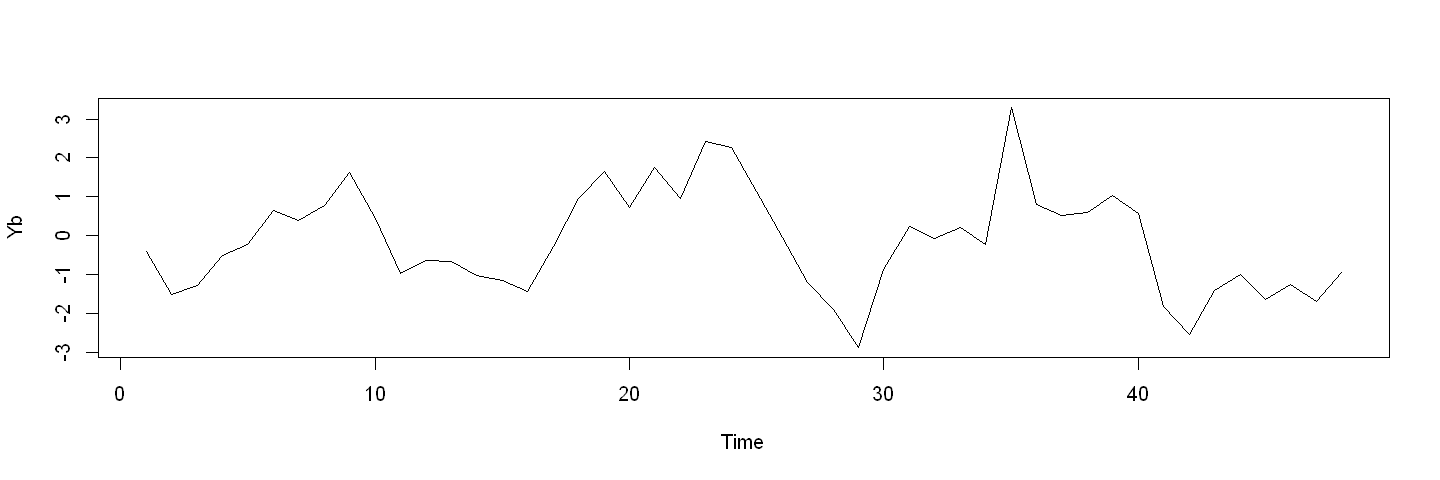

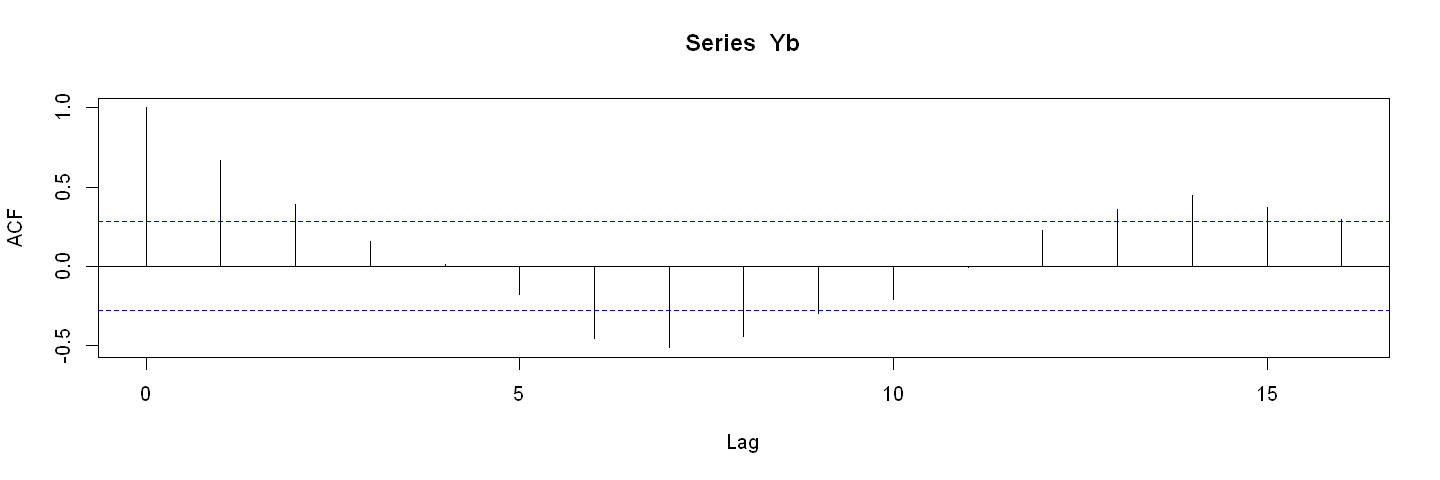

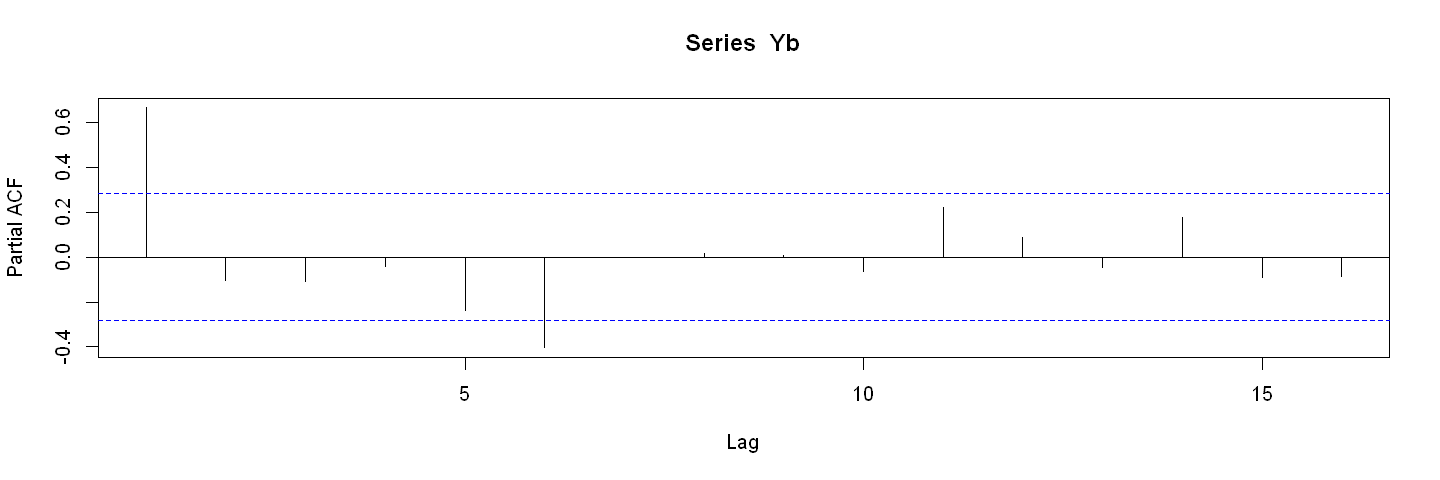

In [8]:
options(repr.plot.width=12, repr.plot.height=4)

plot(Yb)
acf(Yb)
pacf(Yb)

Results look very similar to the original results.

**Exercise 11.15**.  Consider the air passenger miles time series discussed in this chapter.  The file is named `airmiles`.  Use only the preintervention data (that is, data prior to September 2001) for this exercise.

**(a)** Verify that the sample ACF for the twice differenced series of the logarithms of the preintervention data is as shown in Exhibit 11.5 on page 255.

**(b)** The plot created in part (a) suggests an ARIMA$(0,1,1)\times(0,1,0)_{12}$. Fit this model and assess its adequacy. In particular, verify that additive outliers are detected in December 1996, January 1997, and December 2002.

**(c)** Now fit an ARIMA$(0,1,1)\times(0,1,0)_{12}$ + three outliers model and assess its adequacy.

**(d)** Finally, fit an ARIMA$(0,1,1)\times(0,1,1)_{12}$ + three outliers model and assess its adequacy.

**Solution**.

In [9]:
require(zoo)
require(data.table)

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: data.table



In [10]:
data <- fread('../data/airmiles.dat')
data[, 'date' := time(zooreg(1:nrow(data), as.yearmon("1996-01"), freq = 12))]
data = data[data[['date']] < '2001-09']

**(a)**

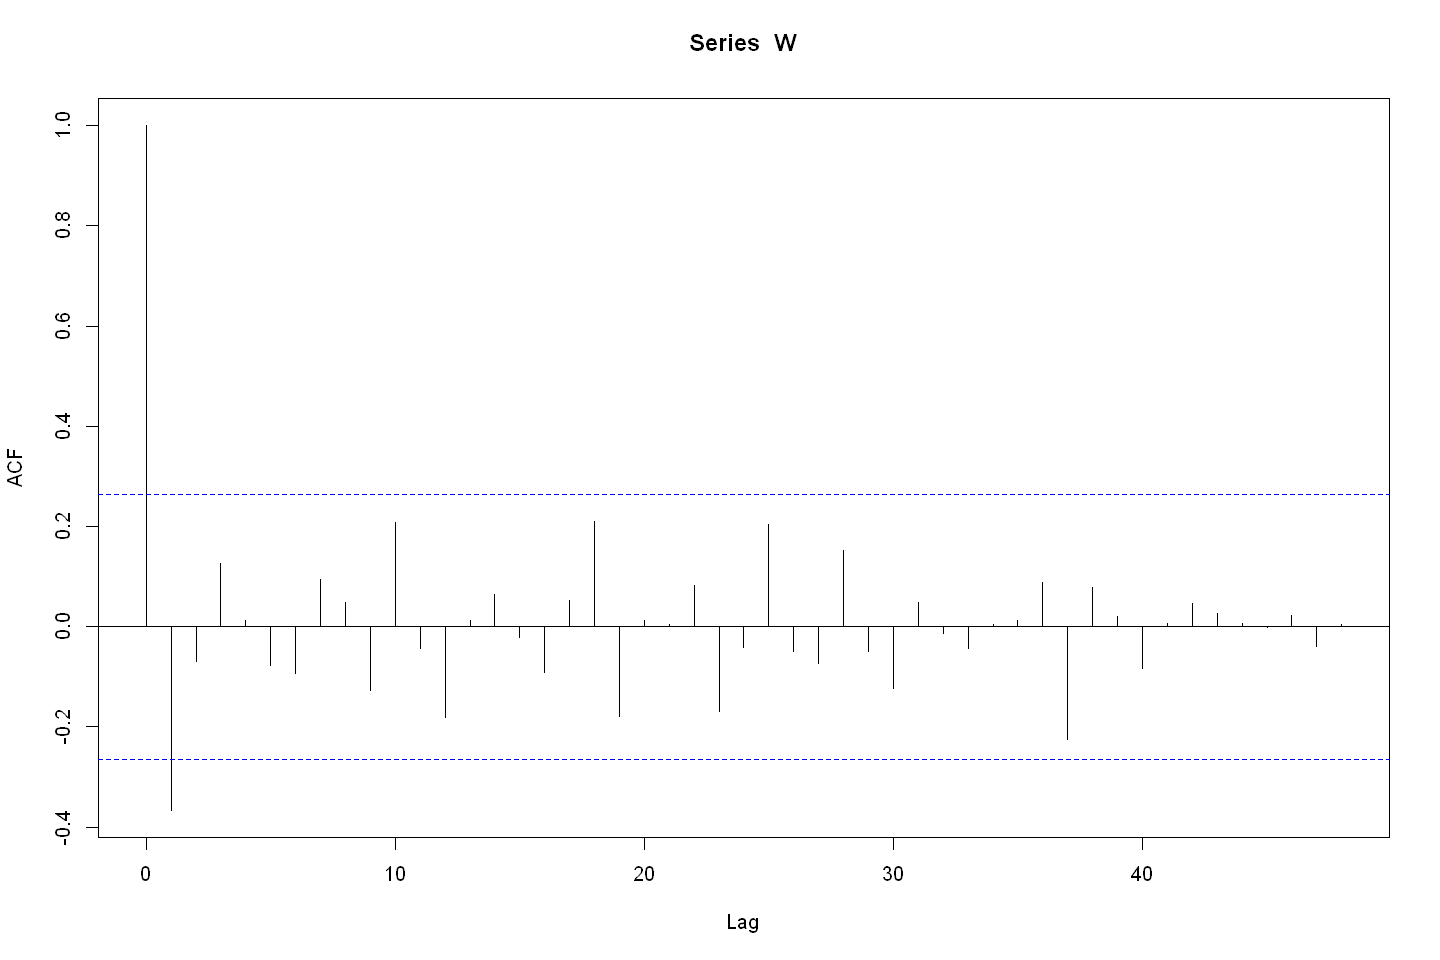

In [11]:
Y = data[['airmiles']]
Z = diff(log(Y))
W = diff(Z, 12)

options(repr.plot.width=12, repr.plot.height=8)
acf(W, lag.max=48)

**(b)**

In [12]:
model = arima(log(Y), order=c(0, 1, 1), seasonal=list(order=c(0, 1, 0), period=12))
model


Call:
arima(x = log(Y), order = c(0, 1, 1), seasonal = list(order = c(0, 1, 0), period = 12))

Coefficients:
          ma1
      -0.4391
s.e.   0.1173

sigma^2 estimated as 0.00143:  log likelihood = 101.98,  aic = -199.96

The coefficient estimate is significant.  Looking at the residuals:

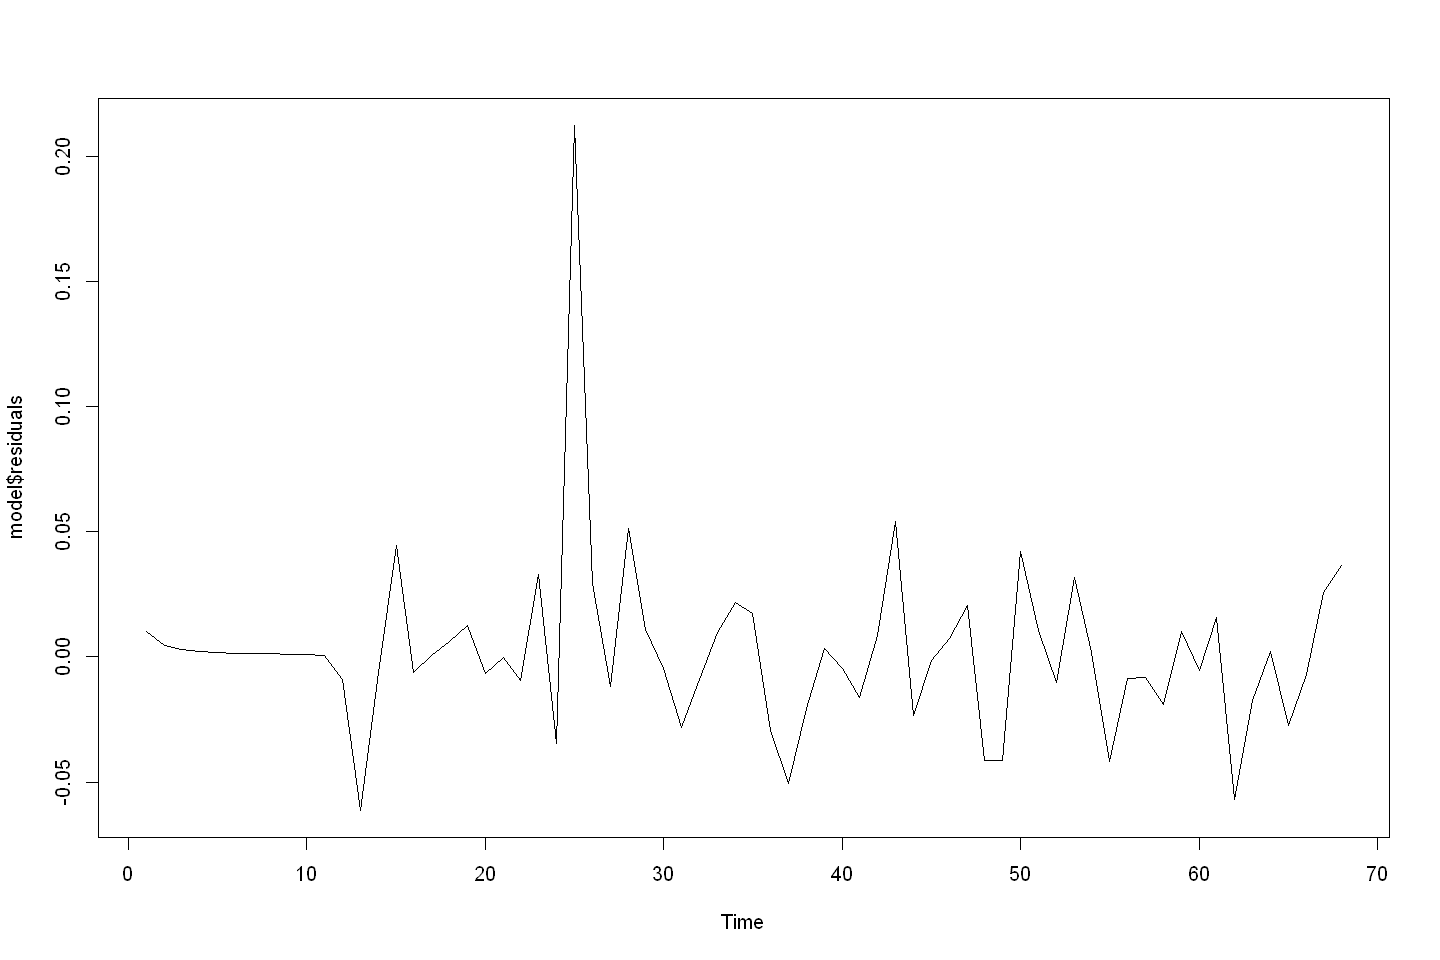

In [13]:
plot(model$residuals)

There seems to be one clear outlier.  Performing outlier detection:

In [14]:
source('outlier_detection.R')

In [15]:
detectAO(model)

             [,1]
ind     25.000000
lambda2  8.114303


In [16]:
detectIO(model)

             [,1]
ind     25.000000
lambda1  8.434743


Both $\hat{\lambda}_1$ and $\hat{\lambda}_2$ are significant at the 5% level for this residual.

**(c)**  We will fit the model with only the one IO residual detected:

In [17]:
xreg = c(rep(0, 24), 1, rep(0, length(Y) - 25))

model = arima(log(Y), order=c(0, 1, 1), seasonal=list(order=c(0, 1, 0), period=12), xreg=xreg)
model


Call:
arima(x = log(Y), order = c(0, 1, 1), seasonal = list(order = c(0, 1, 0), period = 12), 
    xreg = xreg)

Coefficients:
          ma1    xreg
      -0.3569  0.0837
s.e.   0.1189  0.0190

sigma^2 estimated as 0.001069:  log likelihood = 110.03,  aic = -214.06

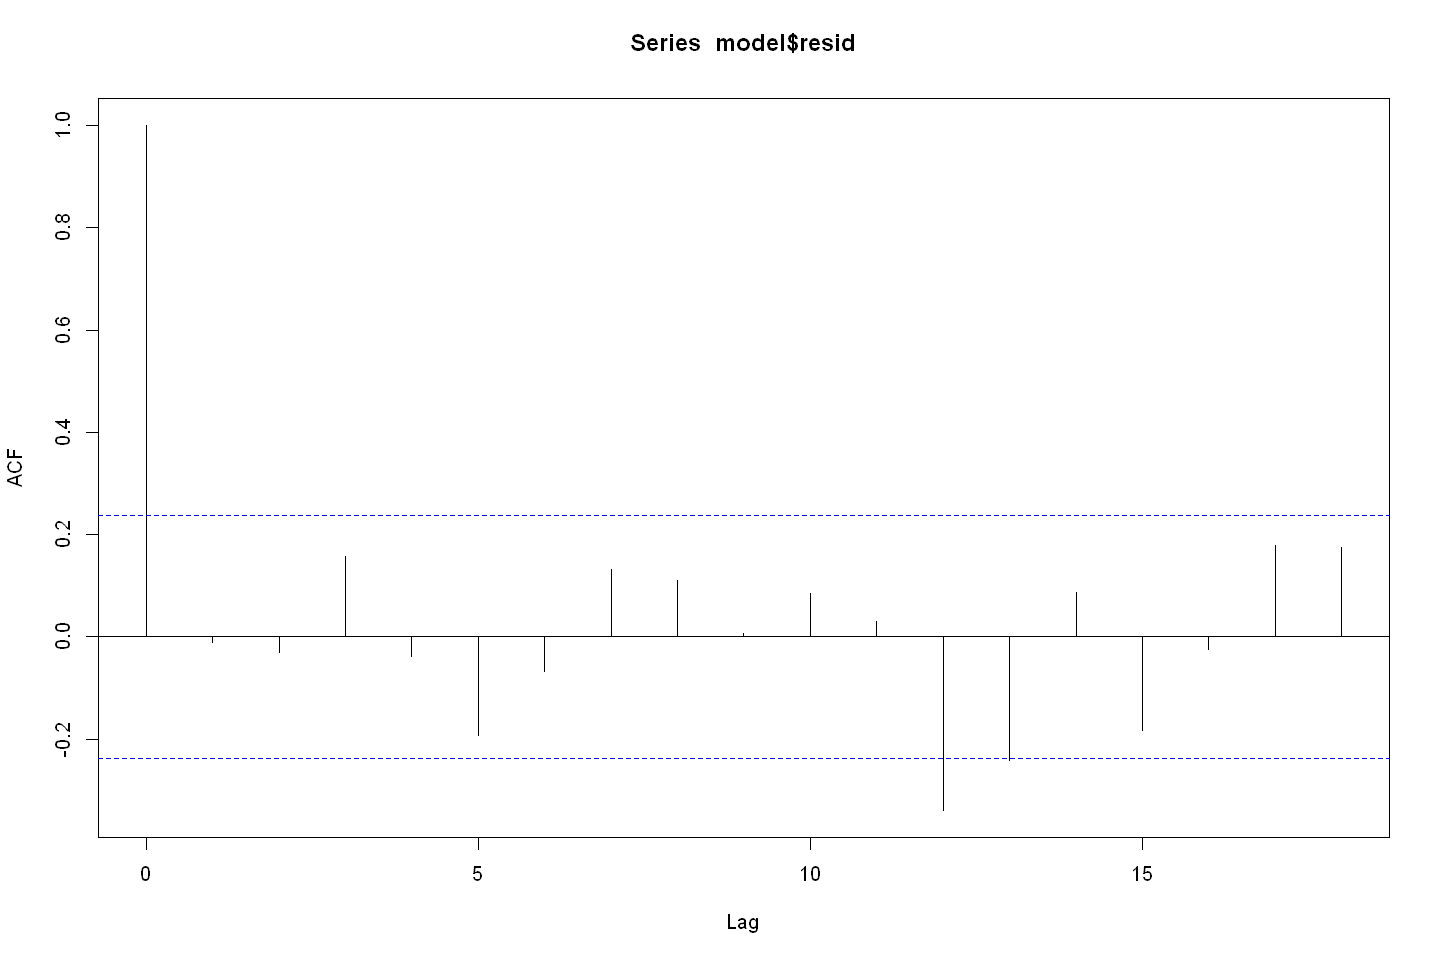

In [18]:
options(repr.plot.width=12, repr.plot.height=8)
acf(model$resid)

ACF still indicates a significant autocorrelation at lag 12, showing some seasonality may have not been captured.

**(d)**  We will now fit the model with $Q = 1$:

In [19]:
xreg = c(rep(0, 24), 1, rep(0, length(Y) - 25))

model = arima(log(Y), order=c(0, 1, 1), seasonal=list(order=c(0, 1, 1), period=12), xreg=xreg)
model


Call:
arima(x = log(Y), order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 12), 
    xreg = xreg)

Coefficients:
          ma1     sma1    xreg
      -0.4053  -0.3110  0.0852
s.e.   0.1152   0.1678  0.0214

sigma^2 estimated as 0.0009753:  log likelihood = 111.91,  aic = -215.82

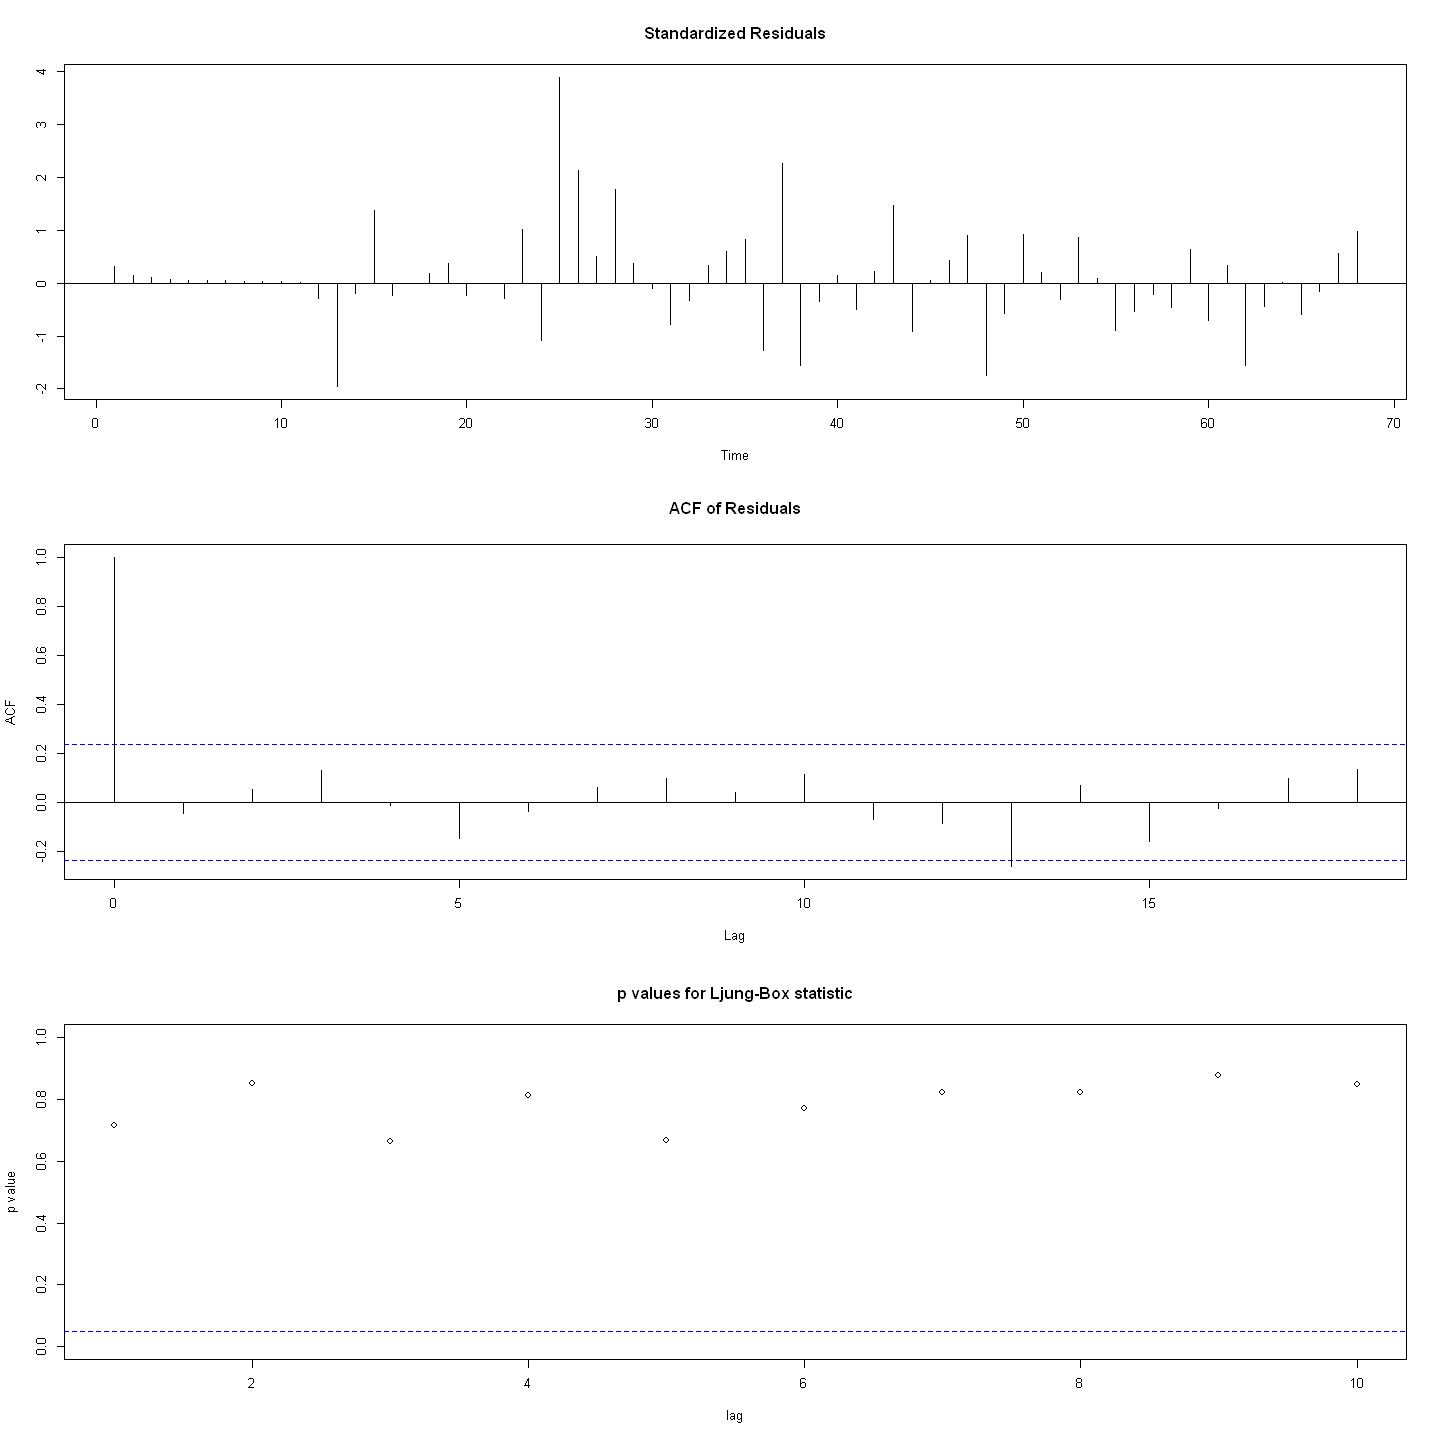

In [20]:
options(repr.plot.width=12, repr.plot.height=12)
tsdiag(model)

The ACF for lag 12 is now gone -- though the ACF for lag 13 is slightly over the significance threshold.